In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.sparse as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import anndata
import scanpy as sc
import sctk as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
import os
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
ss.set_figsize((4, 4))

In [7]:
data_root = Path('/lustre/scratch126/cellgen/team205/nh3/skin').resolve()
proj_root = Path('~/FCA_Fetal_Skin_priv/').expanduser()
os.chdir(proj_root)
!pwd

/home/jovyan/FCA_Fetal_Skin_priv


In [8]:
ad = sc.read(Path(data_root, '20200615_stroma_pass2/fetal_skin.stroma_cells_pass2.processed.annotated.cellxgene.h5ad'))

Only considering the two last: ['.cellxgene', '.h5ad'].
Only considering the two last: ['.cellxgene', '.h5ad'].


In [9]:
ad

AnnData object with n_obs × n_vars = 119611 × 27117
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'n_counts', 'n_genes', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'annot', 'rachel_annot1', 'rachel_annot2', 'broad_annot', 'nh3_annot1'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_bk'

<AxesSubplot: title={'center': 'nh3_annot1'}, xlabel='umap_bk1', ylabel='umap_bk2'>

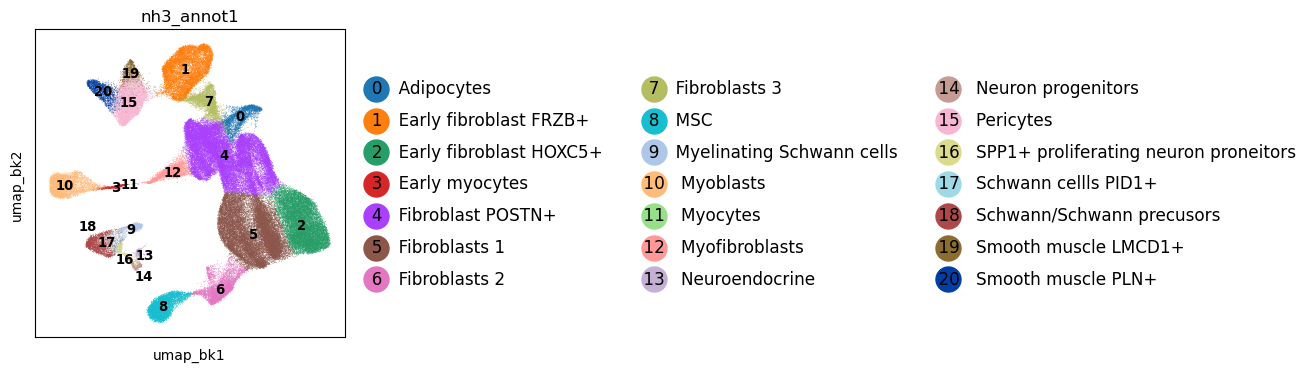

In [12]:
ss.plot_embedding(ad, basis='umap_bk', groupby='nh3_annot1')

In [13]:
ad.obs.nh3_annot1.cat.rename_categories({
    'Fibroblasts 1': 'Pre-dermal condensate',
    'Fibroblasts 2': 'Dermal condensate',
    'Fibroblasts 3': 'Fibroblasts unknown',
    'MSC': 'Dermal papillia',
}, inplace=True)

In [14]:
plot_df = pd.concat([
    ad.obs,
    pd.DataFrame(ad.obsm['X_umap_bk'], index=ad.obs_names, columns=['UMAP1', 'UMAP2'])
], axis=1)

In [15]:
plot_df.head()

,bh_doublet_pval,cell_caller,cluster_scrublet_score,doublet_pval,sanger_id,scrublet_score,chemistry,donor,gender,pcw,...,percent_ribo,percent_hb,percent_top50,annot,rachel_annot1,rachel_annot2,broad_annot,nh3_annot1,UMAP1,UMAP2
index,,,,,,,,,,,,,,,,,,,,,
ACACCCTGTCGTTGTA-1-4834STDY7002879,0.966343,Both,0.093616,0.829861,4834STDY7002879,0.105590,SC3Pv2,F16,male,8,...,24.921396,0.055160,26.636880,fs_Fibroblast,Fibroblast_adipocytes,Fibroblast,fibroblasts,Fibroblast POSTN+,4.810856,2.362793
ACTGTCCGTAGCGATG-1-4834STDY7002879,0.966343,Both,0.093616,0.829861,4834STDY7002879,0.089888,SC3Pv2,F16,male,8,...,28.725538,0.085919,31.303103,fs_Fibroblast,Fibroblast_adipocytes,Fibroblast,fibroblasts,Fibroblast POSTN+,4.969224,2.083270
AGCGGTCAGCTTCGCG-1-4834STDY7002879,0.907861,Empt,0.173188,0.404388,4834STDY7002879,0.201970,SC3Pv2,F16,male,8,...,43.130630,0.112613,39.752252,nan,Cluster_8,Fibroblast,fibroblasts,Fibroblast POSTN+,5.697248,0.113893
AGTGAGGCAAAGTGCG-1-4834STDY7002879,0.966343,Both,0.093616,0.829861,4834STDY7002879,0.066038,SC3Pv2,F16,male,8,...,24.100899,0.079088,28.533966,fs_Fibroblast,Fibroblast_adipocytes,Fibroblast,fibroblasts,Fibroblast POSTN+,4.473129,2.440828
ATAACGCGTACCGGCT-1-4834STDY7002879,0.966343,Both,0.093616,0.829861,4834STDY7002879,0.089888,SC3Pv2,F16,male,8,...,23.864885,0.071869,26.752346,fs_Fibroblast,Fibroblast_adipocytes,Fibroblast,fibroblasts,Fibroblast POSTN+,4.452647,3.249878


In [19]:
# plot_df.to_csv('fetal_skin.stroma.annotation_with_UMAP.20200907.tsv', sep='\t')